In [9]:
import os
import sys
from hyperlpr import HyperLPR_PlateRecogntion as hp
import glob
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np

['images/4.jpg', 'images/2.jpg', 'images/3.jpg', 'images/demo2.jpg', 'images/5.jpg', 'images/1.jpg']


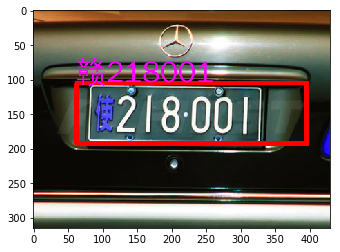

[['赣218001', 0.7597356545073646, [63, 105, 396, 193]]]


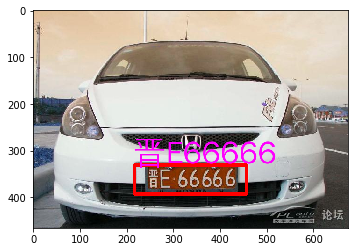

[['晋E66666', 0.9805231434958321, [217, 331, 456, 393]]]


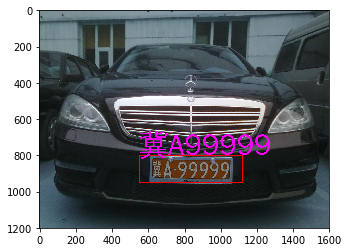

[['冀A99999', 0.9742711186408997, [552, 801, 1121, 951]]]


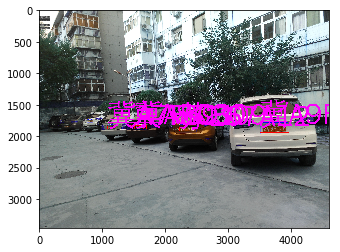

[['冀A8C309', 0.9665887696402413, [1516, 1831, 1711, 1882]], ['冀A7F691', 0.9731021778924125, [1087, 1837, 1271, 1886]], ['京A8C30', 0.8452183827757835, [1458, 1830, 1662, 1884]], ['苏E67A12', 0.9480080434254238, [2233, 1852, 2497, 1922]], ['冀A9F3J6', 0.9766464744295392, [3507, 1820, 3972, 1943]]]


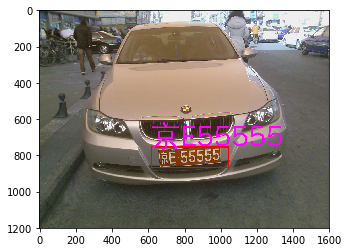

[['京E55555', 0.9777569770812988, [619, 754, 1045, 867]]]


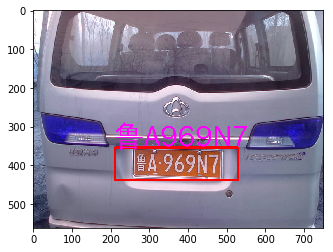

[['鲁A969N7', 0.9797719887324742, [211, 354, 528, 438]]]


In [20]:
images_path=glob.glob('images/*.jpg')
print(images_path)

for p in images_path:
    img=cv2.imread(p)
    
    results=hp(img)
    for r in results:
        plate,probability,box=tuple(r)
        cv2.rectangle(img,pt1=(box[0],box[1]),pt2=(box[2],box[3]),color=(255,0,0),thickness=5)
    
    cv2img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2和PIL中颜色的hex码的储存顺序不同
    pilimg = Image.fromarray(cv2img)
    draw = ImageDraw.Draw(pilimg) # 图片上打印
    img_scale=max(img.shape)
    font = ImageFont.truetype("wqy-zenhei.ttc", img_scale//10, encoding="utf-8") # 参数1：字体文件路径，参数2：字体大小
    for r in results:
        plate,probability,box=tuple(r)
        draw.text((box[0],box[1]-img_scale//10), plate, (255, 0, 255), font=font) # 参数1：打印坐标，参数2：文本，参数3：字体颜色，参数4：字体
#         fontScale=max(img.shape)*0.002
#         cv2.putText(img,text=plate,org=(box[0],box[1]),color=(0,0,255),fontFace=cv2.FONT_HERSHEY_DUPLEX,fontScale=fontScale,thickness=5)
    
    
    cv2charimg = cv2.cvtColor(np.array(pilimg), cv2.COLOR_RGB2BGR)
    plt.imshow(cv2charimg)
    plt.show()
    print(results)